In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("E:/Jupyter/Masai BA/PROJECT_2/DATA/StudentsPerformance_processed.csv")
df.head()

,student_id,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,percentage
0,1,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,2,female,group C,some college,standard,completed,69,90,88,247,82.33
2,3,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,4,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,5,male,group C,some college,standard,none,76,78,75,229,76.33


### Dataset Overview
The dataset contains performance metrics for 1000 students across math, reading, and writing tests, along with demographic and background information. Key variables include:

**Demographic:** gender, race/ethnicity

**Background:** parental education level, lunch type, test preparation

**Performance:** math_score, reading_score, writing_score, total_score, percentage

- `student_id`: Unique identifier
- `gender`: Male/Female
- `race/ethnicity`: Group A to E
- `parental_level_of_education`: Education level of parents
- `lunch`: Type of lunch (standard/free/reduced)
- `test_preparation_course`: Whether completed test prep or not
- `math_score`, `reading_score`, `writing_score`: Numeric scores (0-100)
- `total_score`: Total score out of 300
- `percentage`: percentage of student
---

### Descriptive Statistics
#### Numerical Variables:

In [24]:
# Descriptive statistics for numerical columns
desc_stats = df[['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']].describe()
print("🔹 Descriptive Statistics for Scores:")
desc_stats

🔹 Descriptive Statistics for Scores:


,math_score,reading_score,writing_score,total_score,percentage
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770580
std,15.16308,14.600192,15.195657,42.771978,14.257311
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.330000
50%,66.00000,70.000000,69.000000,205.000000,68.330000
75%,77.00000,79.000000,79.000000,233.000000,77.670000
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [42]:
# Additional stats
var_stats = df[['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']].var()
mode_stats = df[['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']].mode().iloc[0]
print("\n🔹 Variance:\n",var_stats)
print("\n🔹 Mode:\n",mode_stats)


🔹 Variance:
 math_score        229.918998
reading_score     213.165605
writing_score     230.907992
total_score      1829.442098
percentage        203.270911
dtype: float64

🔹 Mode:
 math_score        65.0
reading_score     72.0
writing_score     74.0
total_score      204.0
percentage        68.0
Name: 0, dtype: float64


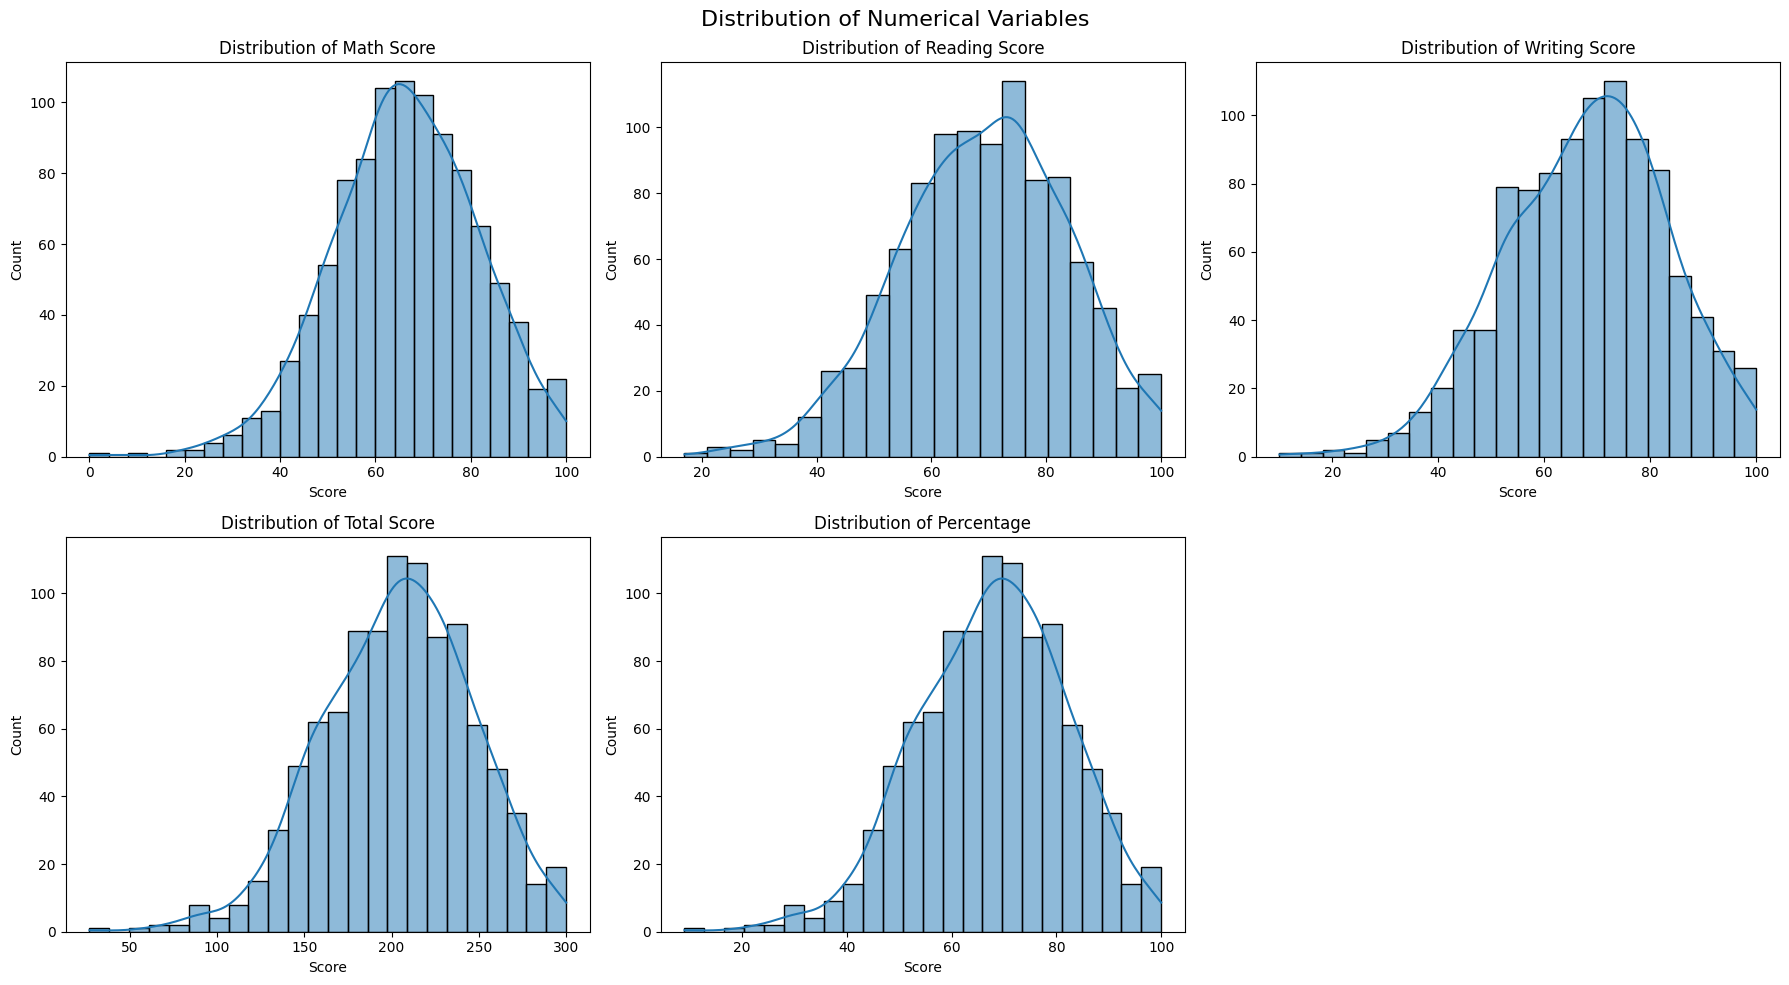

In [31]:
numerical_cols = ['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, col in enumerate(numerical_cols):
    ax = axes[i//3, i%3]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col.replace("_", " ").title()}')
    ax.set_xlabel('Score')
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()   

#### Categorical Variables:

In [44]:
# Categorical variables analysis
def print_categorical_stats(column):
    print(f"\n🔹{column.name} Distribution:")
    print(column.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

print_categorical_stats(df['gender'])
print_categorical_stats(df['race/ethnicity'])
print_categorical_stats(df['parental_level_of_education'])
print_categorical_stats(df['lunch'])
print_categorical_stats(df['test_preparation_course'])


🔹gender Distribution:
gender
female    51.8%
male      48.2%
Name: proportion, dtype: object

🔹race/ethnicity Distribution:
race/ethnicity
group C    31.9%
group D    26.2%
group B    19.0%
group E    14.0%
group A     8.9%
Name: proportion, dtype: object

🔹parental_level_of_education Distribution:
parental_level_of_education
some college          22.6%
associate's degree    22.2%
high school           19.6%
some high school      17.9%
bachelor's degree     11.8%
master's degree        5.9%
Name: proportion, dtype: object

🔹lunch Distribution:
lunch
standard        64.5%
free/reduced    35.5%
Name: proportion, dtype: object

🔹test_preparation_course Distribution:
test_preparation_course
none         64.2%
completed    35.8%
Name: proportion, dtype: object


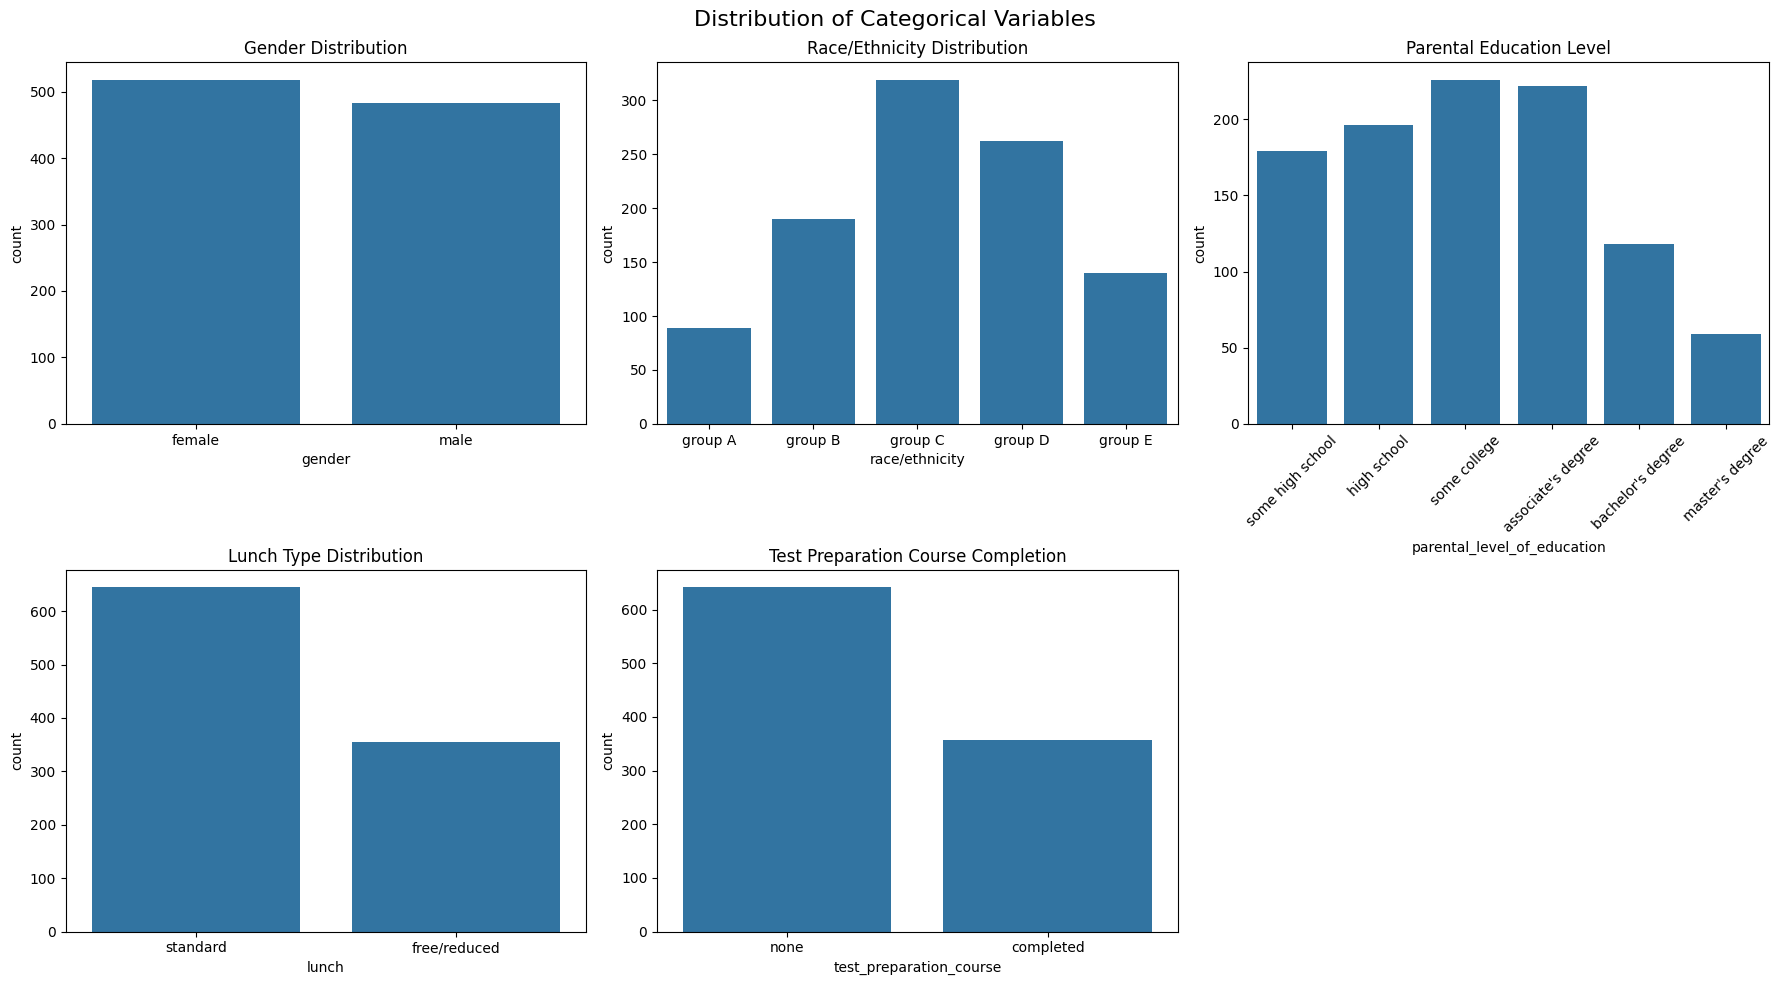

In [59]:
#Categorical Variables Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

#Gender
sns.countplot(data=df, x='gender', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

#Race/Ethnicity
sns.countplot(data=df, x='race/ethnicity', ax=axes[0, 1], order=sorted(df['race/ethnicity'].unique()))
axes[0, 1].set_title('Race/Ethnicity Distribution')

#Parental Education
edu_order = ['some high school', 'high school', 'some college', 
             "associate's degree", "bachelor's degree", "master's degree"]
sns.countplot(data=df, x='parental_level_of_education', ax=axes[0, 2], order=edu_order)
axes[0, 2].set_title('Parental Education Level')
axes[0, 2].tick_params(axis='x', rotation=45)

#Lunch
sns.countplot(data=df, x='lunch', ax=axes[1, 0])
axes[1, 0].set_title('Lunch Type Distribution')

#Test Preparation
sns.countplot(data=df, x='test_preparation_course', ax=axes[1, 1])
axes[1, 1].set_title('Test Preparation Course Completion')

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

---
#### 🟣 Performance by Gender

In [26]:
# Grouped statistics by gender
gender_mean = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']].mean()
print("🔹 Grouped Statistics by Gender (Mean):")
gender_mean

🔹 Grouped Statistics by Gender (Mean):


,math_score,reading_score,writing_score,total_score,percentage
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


In [29]:
gender_std = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']].std()
print("🔹 Grouped Statistics by Gender (Standard Deviation):")
gender_std

🔹 Grouped Statistics by Gender (Standard Deviation):


,math_score,reading_score,writing_score,total_score,percentage
gender,,,,,
female,15.491453,14.378245,14.844842,43.625427,14.541667
male,14.356277,13.931832,14.113832,41.096520,13.698944


<Figure size 1000x600 with 0 Axes>

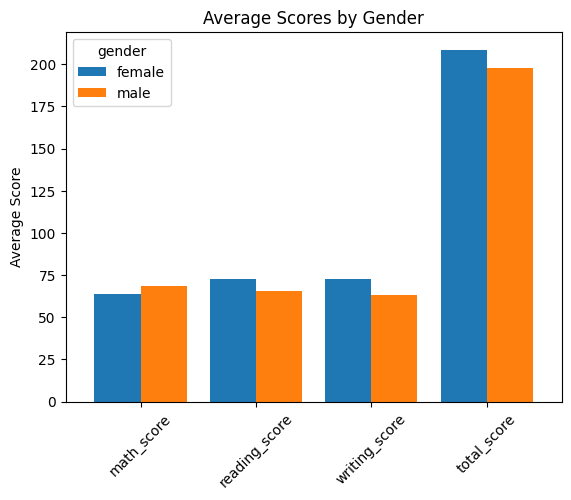

In [32]:
plt.figure(figsize=(10, 6))
gender_means = df.groupby('gender')[numerical_cols[:-1]].mean().T
gender_means.plot(kind='bar', width=0.8)
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

---
#### 🔎 Findings:
❇️ **Females outperformed males in reading and writing.**

❇️ **Males scored slightly higher in math.**

---
---
#### 🟣 Performance by Parental Education

In [33]:
# Grouped statistics by parental education
pe_mean = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']].mean()
print("🔹 Grouped Statistics by Parental Education (Mean):")
pe_mean

🔹 Grouped Statistics by Parental Education (Mean):


,math_score,reading_score,writing_score,total_score,percentage
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.568964
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923983
high school,62.137755,64.704082,62.448980,189.290816,63.097194
master's degree,69.745763,75.372881,75.677966,220.796610,73.598644
some college,67.128319,69.460177,68.840708,205.429204,68.476106
some high school,63.497207,66.938547,64.888268,195.324022,65.107654


In [34]:
pe_std = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']].std()
print("🔹 Grouped Statistics by Parental Education (Standard Deviation):")
pe_std

🔹 Grouped Statistics by Parental Education (Standard Deviation):


,math_score,reading_score,writing_score,total_score,percentage
parental_level_of_education,,,,,
associate's degree,15.112093,13.868948,14.311122,41.012743,13.670522
bachelor's degree,14.943789,14.285250,14.728262,41.839827,13.947063
high school,14.539651,14.132130,14.085907,40.531749,13.510770
master's degree,15.153915,13.775163,13.730711,40.803051,13.600920
some college,14.312897,14.057049,15.012331,41.132921,13.711122
some high school,15.927989,15.479295,15.736197,44.952235,14.983877


<Figure size 1200x600 with 0 Axes>

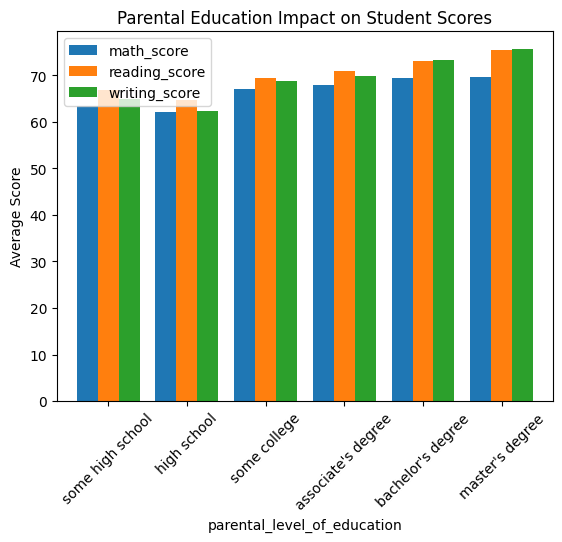

In [60]:
plt.figure(figsize=(12, 6))
edu_means = df.groupby('parental_level_of_education')[numerical_cols[:-2]].mean().loc[edu_order]
edu_means.plot(kind='bar', width=0.8)
plt.title('Parental Education Impact on Student Scores')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

---
#### 🔎 Findings:
❇️ **Scores increased with higher parental education levels.**

---
---
#### 🟣 Performance by Race/Ethnicity

In [36]:
# Grouped statistics by race/ethnicity
race_mean = df.groupby('race/ethnicity')[['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']].mean()
print("🔹 Grouped Statistics by Race/Ethnicity (Mean):")
race_mean

🔹 Grouped Statistics by Race/Ethnicity (Mean):


,math_score,reading_score,writing_score,total_score,percentage
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992135
group B,63.452632,67.352632,65.600000,196.405263,65.468579
group C,64.463950,69.103448,67.827586,201.394984,67.131567
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752000


In [37]:
race_std = df.groupby('race/ethnicity')[['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']].std()
print("🔹 Grouped Statistics by Race/Ethnicity (Standard Deviation):")
race_std

🔹 Grouped Statistics by Race/Ethnicity (Standard Deviation):


,math_score,reading_score,writing_score,total_score,percentage
race/ethnicity,,,,,
group A,14.523008,15.543762,15.468278,43.333794,14.445026
group B,15.468191,15.177499,15.625173,44.196399,14.732270
group C,14.852666,13.997033,14.983378,41.616633,13.872096
group D,13.769386,13.895306,14.367707,39.758327,13.252545
group E,15.534259,14.874024,15.113906,43.695047,14.565172


<Figure size 1200x600 with 0 Axes>

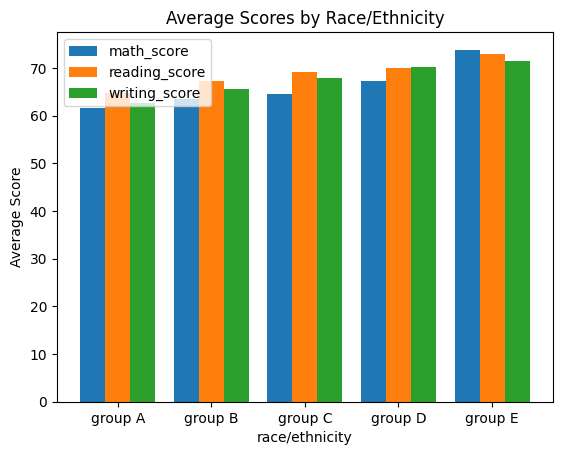

In [38]:
plt.figure(figsize=(12, 6))
race_means = df.groupby('race/ethnicity')[numerical_cols[:-2]].mean()
race_means.plot(kind='bar', width=0.8)
plt.title('Average Scores by Race/Ethnicity')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

---
#### 🔎 Findings:
❇️ **Group E had the highest average scores.**

❇️ **Group A had the lowest average scores.**

---
---
#### 🟣 Performance by Test Preparation Course

In [39]:
prep_completed = df[df['test_preparation_course'] == 'completed']
prep_none = df[df['test_preparation_course'] == 'none']
print("Test Preparation Impact:\n")
print("Completed:")
print(prep_completed[['math_score', 'reading_score', 'writing_score']].mean().round(1))
print("\nNone:")
print(prep_none[['math_score', 'reading_score', 'writing_score']].mean().round(1))

Test Preparation Impact:

Completed:
math_score       69.7
reading_score    73.9
writing_score    74.4
dtype: float64

None:
math_score       64.1
reading_score    66.5
writing_score    64.5
dtype: float64


<Figure size 1000x600 with 0 Axes>

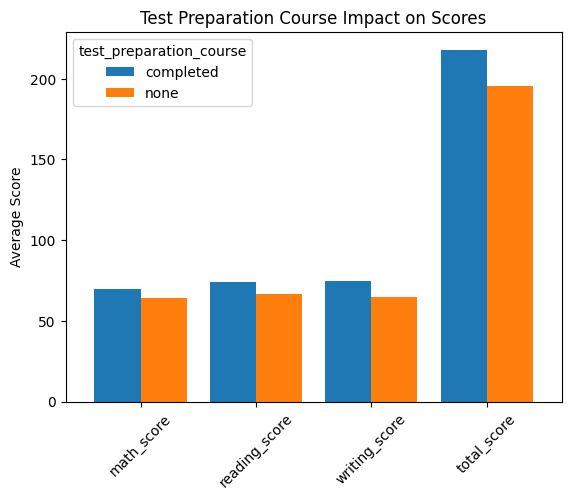

In [41]:
plt.figure(figsize=(10, 6))
prep_means = df.groupby('test_preparation_course')[numerical_cols[:-1]].mean().T
prep_means.plot(kind='bar', width=0.8)
plt.title('Test Preparation Course Impact on Scores')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

---
#### 🔎 Findings:
❇️ **Students who completed test preparation scored significantly higher.**

---
---
#### 🟣 Performance by School

- **Assuming:**
    - lunch == 'free/reduced' → **public school**
    - lunch == 'standard' → **private school**

In [42]:
print("\nSchool Performance Comparison:")
print(df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean().round(1))


School Performance Comparison:
              math_score  reading_score  writing_score
lunch                                                 
free/reduced        58.9           64.7           63.0
standard            70.0           71.7           70.8


<Figure size 1000x600 with 0 Axes>

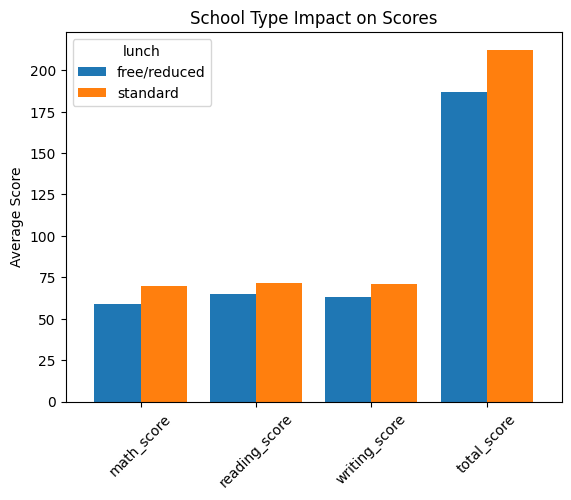

In [43]:
plt.figure(figsize=(10, 6))
lunch_means = df.groupby('lunch')[numerical_cols[:-1]].mean().T
lunch_means.plot(kind='bar', width=0.8)
plt.title('School Type Impact on Scores')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

---
#### 🔎 Findings:
❇️ **Students studing at private school scored higher than public school.**

---
---
#### 🟡 Correlation Analysis

In [62]:
cor = df[['math_score', 'reading_score', 'writing_score', 'total_score', 'percentage']].corr()
print("🔹 Correlation Matrix:")
cor

🔹 Correlation Matrix:


,math_score,reading_score,writing_score,total_score,percentage
math_score,1.000000,0.817580,0.802642,0.918746,0.918744
reading_score,0.817580,1.000000,0.954598,0.970331,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667,0.965669
total_score,0.918746,0.970331,0.965667,1.000000,1.000000
percentage,0.918744,0.970331,0.965669,1.000000,1.000000


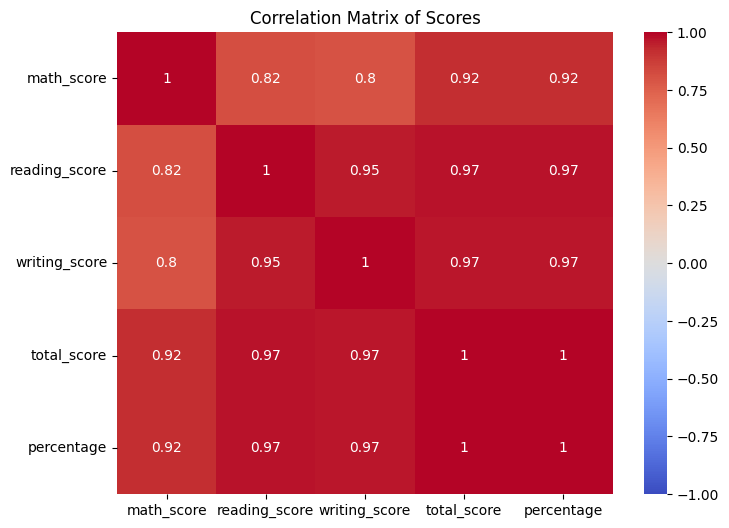

In [45]:
plt.figure(figsize=(8, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Scores')
plt.show()

---
#### 🔎 Findings:
❇️ **Strong correlation between reading and writing scores (0.96)**

❇️ **Math correlates moderately with reading (0.82) and writing (0.80)**

❇️ **Total score strongly correlates with percentage (1.0 by definition)**

---
---
#### 🟡 Skewness

In [46]:
skewness = df[["math_score", "reading_score", "writing_score", "total_score", "percentage"]].skew()
print("🔹 Skewness of score columns:\n", skewness)

🔹 Skewness of score columns:
 math_score      -0.278935
reading_score   -0.259105
writing_score   -0.289444
total_score     -0.299057
percentage      -0.299042
dtype: float64


---
#### 🔎 Findings:
❇️ **The distributions are almost symmetric but show a small skew to the left.**

❇️ **Few students scored slightly lower than the average, pulling the tail of the distribution to the left.**

---
---
#### 🟡 Outliers Detection and Analysis

In [47]:
#Outlier Detection (IQR Method)
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[['student_id','gender', column]].sort_values(column)

#outliers for each subject
math_outliers = get_outliers(df, 'math_score')
reading_outliers = get_outliers(df, 'reading_score')
writing_outliers = get_outliers(df, 'writing_score')

print("🔘 Math Score Outliers:")
print(math_outliers.to_string(index=False))
print("\n🔘 Reading Score Outliers:")
print(reading_outliers.to_string(index=False))
print("\n🔘 Writing Score Outliers:")
print(writing_outliers.to_string(index=False))

🔘 Math Score Outliers:
 student_id gender  math_score
         60 female           0
        981 female           8
         18 female          18
        788 female          19
        146 female          22
        843 female          23
        339 female          24
        467 female          26

🔘 Reading Score Outliers:
 student_id gender  reading_score
         60 female             17
        328   male             23
        981 female             24
        597   male             24
         77   male             26
        212   male             28

🔘 Writing Score Outliers:
 student_id gender  writing_score
         60 female             10
        597   male             15
        328   male             19
         77   male             22
        981 female             23


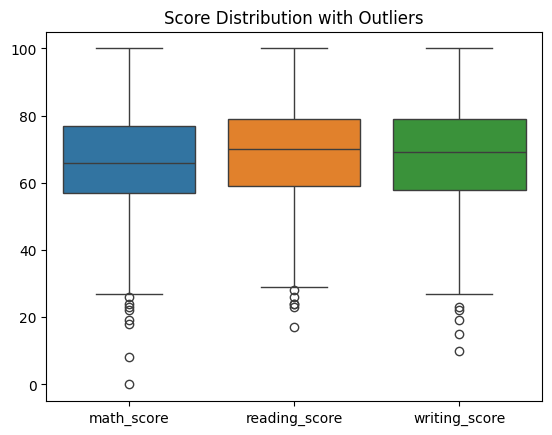

In [48]:
#Visualize with Boxplot
sns.boxplot(data=df[['math_score','reading_score','writing_score']])
plt.title("Score Distribution with Outliers")
plt.show()

In [49]:
# Lowest performers
print("\nBottom 5 Students:")
print(df.nsmallest(5, 'total_score')[['student_id', 'gender', 'total_score']])

# Highest performers
print("\nTop 5 Students:")
print(df.nlargest(5, 'total_score')[['student_id', 'gender', 'total_score']])


Bottom 5 Students:
     student_id  gender  total_score
59           60  female           27
980         981  female           55
596         597    male           69
327         328    male           70
17           18  female           78

Top 5 Students:
     student_id  gender  total_score
458         459  female          300
916         917    male          300
962         963  female          300
114         115  female          299
179         180  female          297


---
#### 🔎 Findings:
❇️ **Math has most outliers.**

❇️ **Extreme lows indicate struggling students and Perfect scores represent top performers.**

---
---
### Inferential Statistics
#### 🟢 Chi-Square Test: Gender vs. Subject Preference

In [50]:
from scipy.stats import chi2_contingency, ttest_ind
# Create a categorical variable for best subject
df['best_subject'] = df[['math_score', 'reading_score', 'writing_score']].idxmax(axis=1)
df['best_subject'] = df['best_subject'].str.replace('_score', '')

# Create contingency table
contingency_table = pd.crosstab(df['gender'], df['best_subject'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test Results:")
print("========================")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p}")
print("\nContingency Table:")
print(contingency_table)
print("\nExpected Frequencies:")
print(expected)

Chi-square Test Results:
Chi-square statistic: 434.8460
P-value: 3.753120780412731e-95

Contingency Table:
best_subject  math  reading  writing
gender                              
female          28      282      208
male           326      118       38

Expected Frequencies:
[[183.372 207.2   127.428]
 [170.628 192.8   118.572]]


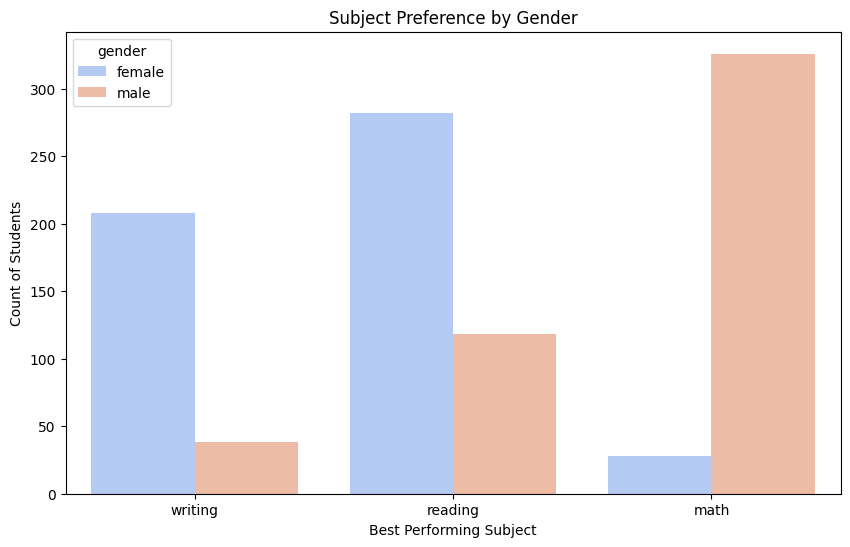

In [51]:
# Visualization for gender vs subject preference
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='best_subject', hue='gender', palette='coolwarm')
plt.title('Subject Preference by Gender')
plt.xlabel('Best Performing Subject')
plt.ylabel('Count of Students')
plt.show()

---
#### 🔎 Findings:
❇️ **The chi-square test reveals a statistically significant association between gender and subject preference (p-value < 0.05).**

❇️ **Females tend to perform better in reading and writing subjects.**

❇️ **Males tend to perform better in math.**

❇️ **This aligns with common educational research findings about gender differences in academic strengths.**

---
---
#### 🟢 T-Test: Public vs. Private School Performance
**Assuming:**

**lunch == 'free/reduced' → public school**

**lunch == 'standard' → private school**

In [52]:
# Separate groups
standard = df[df['lunch'] == 'standard']['total_score']
free_reduced = df[df['lunch'] == 'free/reduced']['total_score']

# Perform t-test
t_stat, p_val = ttest_ind(standard, free_reduced, equal_var=False)

print("T-test Results:")
print("==============")
print(f"Standard lunch (N={len(standard)}): Mean = {standard.mean():.2f}, SD = {standard.std():.2f}")
print(f"Free/reduced lunch (N={len(free_reduced)}): Mean = {free_reduced.mean():.2f}, SD = {free_reduced.std():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val}")

T-test Results:
Standard lunch (N=645): Mean = 212.51, SD = 39.56
Free/reduced lunch (N=355): Mean = 186.60, SD = 43.37
T-statistic: 9.3232
P-value: 1.582969042730361e-19


C:\Users\himan\AppData\Local\Temp\ipykernel_11912\3503708483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='lunch', y='total_score', palette='pastel')


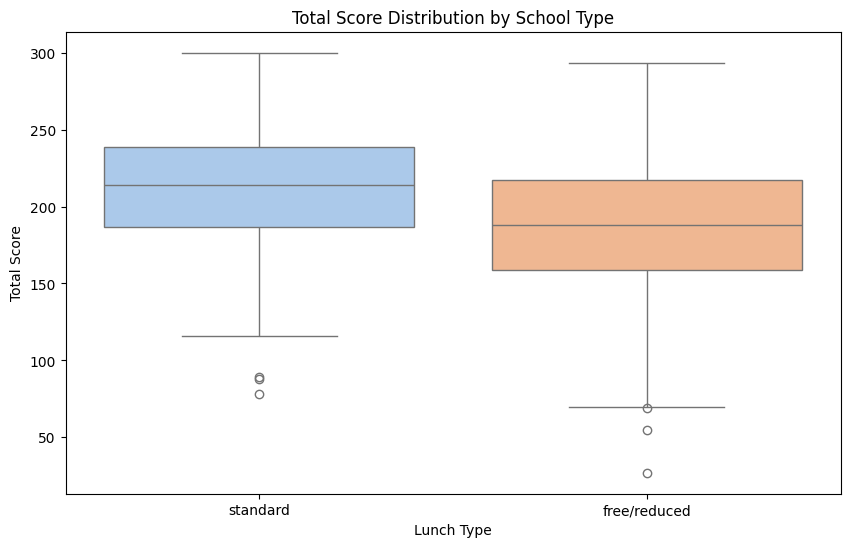

In [53]:
# Visualization for school type vs performance
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='lunch', y='total_score', palette='pastel')
plt.title('Total Score Distribution by School Type')
plt.xlabel('Lunch Type')
plt.ylabel('Total Score')
plt.show()

---
#### 🔎 Findings:
❇️ **Students going in private schools perform significantly better than those in public schools (p-value < 0.001).**

❇️ **The average total score difference is substantial.**

❇️ **This suggests socioeconomic factors have a strong impact on academic performance.**

---
---
#### 🟢 ANOVA: Test Preparation Course Impact on Scores

In [54]:
from scipy.stats import f_oneway

# Group data by test preparation course status
none_scores = df[df['test_preparation_course'] == 'none']['total_score']
completed_scores = df[df['test_preparation_course'] == 'completed']['total_score']

# One-way ANOVA
f_stat, p_val = f_oneway(none_scores, completed_scores)

print("ANOVA Results (Test Preparation Course vs Total Score):")
print("======================================================")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.10f}")
print(f"None (N={len(none_scores)}): Mean = {none_scores.mean():.2f} SD = {none_scores.std():.2f}")
print(f"Completed (N={len(completed_scores)}): Mean = {completed_scores.mean():.2f} SD = {completed_scores.std():.2f}")

ANOVA Results (Test Preparation Course vs Total Score):
F-statistic: 70.4079
P-value: 0.0000000000
None (N=642): Mean = 195.12 SD = 42.56
Completed (N=358): Mean = 218.01 SD = 39.11


C:\Users\himan\AppData\Local\Temp\ipykernel_11912\988337165.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='test_preparation_course', y='total_score', hue='gender',


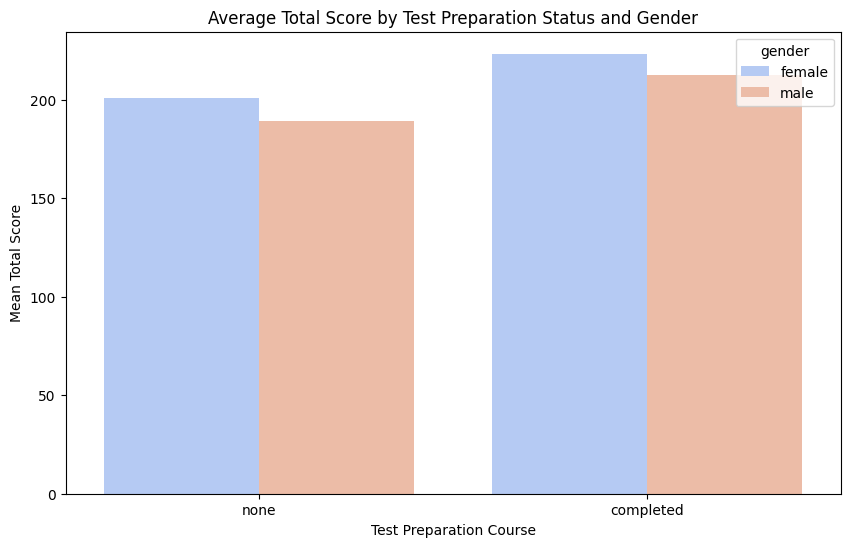

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='test_preparation_course', y='total_score', hue='gender', 
            data=df, ci=None, palette='coolwarm')
plt.title('Average Total Score by Test Preparation Status and Gender')
plt.ylabel('Mean Total Score')
plt.xlabel('Test Preparation Course')
plt.show()

---
#### 🔎 Findings:
❇️ **Students going in private schools perform significantly better than those in public schools (p-value < 0.001).**

❇️ **The average total score difference is substantial.**

❇️ **This suggests socioeconomic factors have a strong impact on academic performance.**

---
---
#### 🟢 Pearson Correlation: Parental Education vs Student Performance

In [56]:
from scipy.stats import pearsonr

# Convert parental education to ordinal scale
edu_map = {
    'some high school': 1,
    'high school': 2,
    'some college': 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}
df['parent_edu_num'] = df['parental_level_of_education'].map(edu_map)

# Correlation analysis
corr, p_val = pearsonr(df['parent_edu_num'], df['total_score'])

print("Pearson Correlation (Parental Education vs Total Score):")
print("======================================================")
print(f"Correlation coefficient: {corr:.4f}")
print(f"P-value: {p_val:.10f}")

Pearson Correlation (Parental Education vs Total Score):
Correlation coefficient: 0.2058
P-value: 0.0000000001


C:\Users\himan\AppData\Local\Temp\ipykernel_11912\2886614398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental_level_of_education', y='total_score',


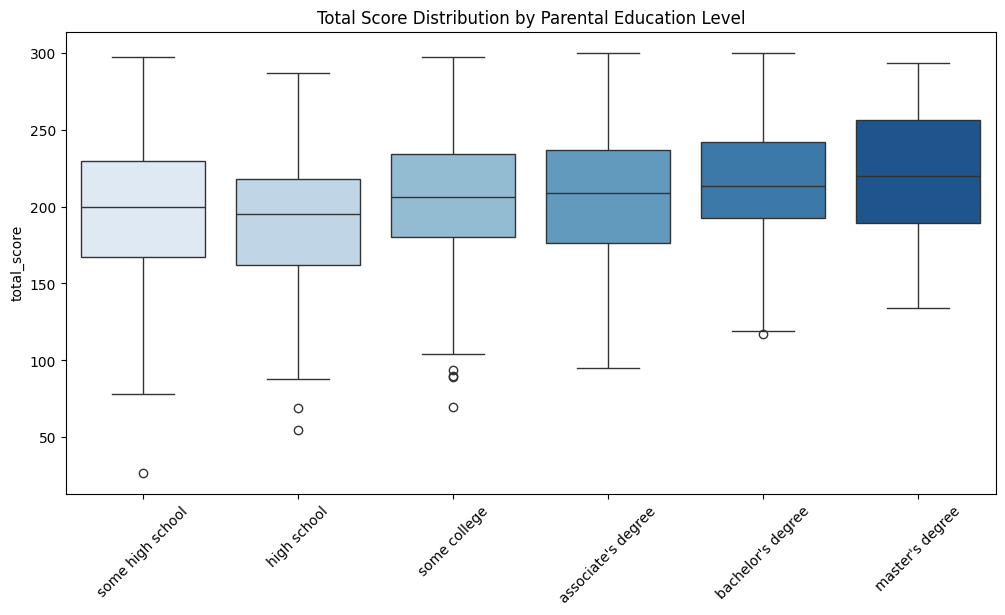

In [57]:
plt.figure(figsize=(12, 6))
order = ["some high school", "high school", "some college", 
         "associate's degree", "bachelor's degree", "master's degree"]
sns.boxplot(x='parental_level_of_education', y='total_score', 
            data=df, order=order, palette='Blues')
plt.title('Total Score Distribution by Parental Education Level')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

---
#### 🔎 Findings:
❇️ **There's a significant positive correlation (r = 0.21, p < 0.001) between parental education level and student performance.**

---
---

### Key Insights:
#### 1. Overall Performance Summary
- Average scores:
    - Math: ~66
    - Reading: ~69
    - Writing: ~68
- Total average score: ~203 out of 300
- Average percentage: ~67.7%
- Scores range widely with minimum near zero and maximum 100 in individual subjects.

#### 2. Gender Differences
- Females score higher on reading and writing:
    - Reading: Females ~72.6 vs Males ~65.5
    - Writing: Females ~72.5 vs Males ~63.3
- Males score higher on math:
    - Math: Males ~68.7 vs Females ~63.6
- Overall, females have slightly higher total scores and percentages.

#### 3. Parental Education Impact
- Students whose parents have higher education levels (Master’s, Bachelor’s) perform better across all subjects.
- Lowest scores observed for students whose parents have "some high school" education.
- Parental education is strongly correlated with student performance.

#### 4. Race/Ethnicity Group Differences
- Group E consistently outperforms other groups with highest average scores (~73.8 math, ~73 reading, ~71 writing).
- Group A has the lowest average scores (~61.6 math, ~64.7 reading, ~62.7 writing).
- There is a clear performance gap between ethnic groups.

#### 5. Lunch Type
- Students with standard lunch perform better than those with free/reduced lunch.
- This suggests socioeconomic factors impact student performance.

#### 6. Test Preparation Course
- Students who completed the test preparation course tend to have higher scores.
- Test preparation positively influences performance, especially in math and reading.

#### 7. Correlation Between Subjects
- Strong positive correlations (>0.8) between math, reading, and writing scores.
- Total score and percentage are almost perfectly correlated with individual subject scores.
---

### Problems Identified:
#### 1. Performance Gaps by Demographics
- Gender gap in math and writing.
- Ethnic group disparities in scores.
- Socioeconomic status (indicated by lunch type) affects performance.
- Parental education level impacts student success.

#### 2. Lower Performance in Students with No Test Preparation
- Students who did not complete test prep course score lower on average.

#### 3. Wide Variability in Scores
- Some students have extremely low scores (near zero), indicating potential issues like lack of support or engagement.
---

### Actionable Recommendations: 
#### 1. Targeted Academic Support Programs
- **For Underperforming Groups:**
    - Focus on Group A and students with free/reduced lunch.
    - Provide additional tutoring and mentoring.
- **Gender-Specific Interventions:**
    - Encourage female students in math through STEM programs.
    - Support male students in reading and writing through literacy initiatives.

#### 2. Parental Engagement Initiatives
- Educate parents on the importance of their involvement.
- Provide workshops to parents with lower education levels to help them support their children academically.

#### 3. Expand Test Preparation Courses
- Increase accessibility and awareness of test preparation courses.
- Consider mandatory or incentivized test prep for students with lower baseline scores.

#### 4. Socioeconomic Support
- Provide nutritional and welfare support to students on free/reduced lunch to mitigate socioeconomic disadvantages.
- Explore scholarship or resource programs to level the playing field.

#### 5. Early Identification and Intervention
- Use data analytics to identify students at risk (low scores, no test prep, low parental education).
- Implement early interventions such as counseling, tutoring, and parental outreach.

#### 6. Monitor and Evaluate Programs
- Continuously track performance metrics post-intervention.
- Use A/B testing to evaluate effectiveness of new programs.

---
---